In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colors

In [2]:
file_paths = ['/Volumes/mo/maiz/census.txt',
              '/Volumes/mo/maiz/census.001.1.txt']
#file_path = 'census.txt'

In [3]:
sc_gen_af = np.empty((0, 3))
for file in file_paths:
    sc_gen_af = np.vstack((sc_gen_af, np.loadtxt(file, usecols=(1, 2, 3))))

In [4]:
sc_gen_af.shape

(149789, 3)

In [5]:
print("sc", sc_gen_af[:, 0].min(), "-", sc_gen_af[:, 0].max(), "gen", sc_gen_af[:, 1].min(), "-", sc_gen_af[:, 1].max(), "af", sc_gen_af[:, 2].min(), "-", sc_gen_af[:, 2].max())

sc 0.00100024 - 0.999981 gen 101.0 - 2480.0 af 0.000193489 - 1.0


### Examining range of generations

In [6]:
min_af = 0.2
max_af = 0.9

mask = np.logical_and(sc_gen_af[:, 2] > min_af, sc_gen_af[:, 2] < max_af)

In [7]:
np.sum(mask)

20218

In [15]:
#mask = np.logical_not(mask)
gen = sc_gen_af[mask, 1]
sc = sc_gen_af[mask, 0]
AF = sc_gen_af[mask, 2]

In [8]:
gen = sc_gen_af[:, 1]
sc = sc_gen_af[:, 0]
AF = sc_gen_af[:, 2]

In [9]:
## Load demography ##

dem = np.genfromtxt("maize_scale_40.param", skip_header=2)

In [ ]:
np.linspace(0, 1, 101)

In [10]:
# set colormap
af_cmap = cm.get_cmap("summer", 101)
af_colour = af_cmap(np.linspace(0, 1, 101))

lost = np.array([0/256, 0/256, 0/256, 1])
low = np.array([128/256, 128/256, 128/256, 1])
high = np.array([255/256, 215/256, 0/256, 1])
fixed = np.array([255/256, 165/256, 0/256, 1])

af_colour[:1, :] = lost
af_colour[1:int(min_af*100), :] = low
af_colour[int(max_af*100):99, :] = high
af_colour[99:, :] = fixed

af_cmap = colors.ListedColormap(af_colour)

# af_cmap.set_over(color="#FF4500", alpha=0.3)
# af_cmap.set_under(color="#D0D0D0", alpha=0.3)

In [11]:
#sc_min, sc_max, gen_min, gen_max = 0.1, 1, 2200, 2500
sc_min, sc_max, gen_min, gen_max = 0.001, 0.1, 100, 2500

In [12]:
sc_range = np.logspace(-3, 0, num=100)

In [ ]:
sc_range = np.linspace(sc_min, sc_max)

In [ ]:
def exp_decay(sc_vec, A, B):
    return np.exp(-A*sc_vec+B)

In [13]:
def parab(sc_vec, A, B):
    return A/(sc_vec**B)

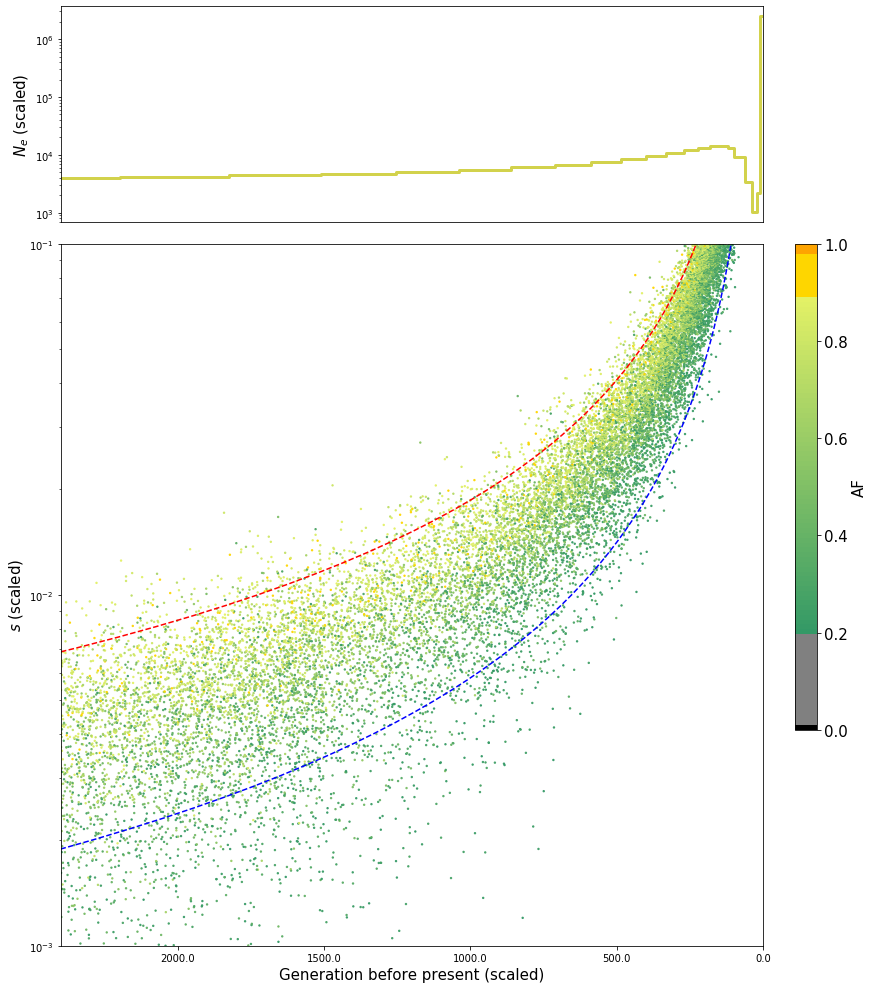

In [19]:
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h+0.01, bottom+0.2, 0.02, height-0.2]

# start with a rectangular Figure
plt.figure(1, figsize=(15, 15))

axScatter = plt.axes(rect_scatter)
axDem = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)


# the scatter plot:
axScatter.scatter(gen, sc, c=AF, s=2, cmap=af_cmap, vmin=0, vmax=1, alpha=0.9) # change vmin, vmax!!

axScatter.plot(2500-parab(sc_range, 18, 0.78), sc_range, "b--")
axScatter.plot(2500-parab(sc_range, 30, 0.88), sc_range, "r--")

#axScatter.axvline(x=2480, ymin=0.1, ymax=1, c='lightblue', ls='-')
#early_gen = np.around(np.maximum(2475 - 500*np.exp(-6*(sc_range-0.1)), 2460 - 180*np.exp(-7*(sc_range-0.1))))
#axScatter.plot(early_gen, sc_range, "g--") # Early generation fit
#late_gen = np.clip(np.around(2485 - 85*np.exp(-6.8*(sc_range-0.1))), a_min=2200, a_max=2480)
#axScatter.plot(late_gen, sc_range, "r--") # Late generation fit

axScatter.set_xlim((gen_min, gen_max))
axScatter.set_ylim((sc_min, sc_max))
axScatter.set_xlabel("Generation before present (scaled)", fontsize=15)
axScatter.set_ylabel("$s$ (scaled)", fontsize=15)
axScatter.set_yscale("log")
ticks = 2500 - axScatter.get_xticks()
axScatter.set_xticklabels(ticks)

## NEW: plot demography ##
axDem.step(dem[:, 0], dem[:, 1], where='post', lw=3, color='y', alpha=0.7)
axDem.set_yscale("log")
axDem.set_xticks([])
axDem.set_xlim(axScatter.get_xlim())
axDem.set_ylabel("$N_e$ (scaled)", fontsize=15)



cbar = plt.colorbar(cm.ScalarMappable(cmap=af_cmap), cax=axHisty)
cbar.set_label('AF',size=15)
cbar.ax.tick_params(labelsize=15) 

plt.savefig("/Users/mo/Desktop/sc_gen.001.01.pdf")
plt.show()

### Inspecting the sampling scheme

In [ ]:
sc_range = np.linspace(0.1, 1)
gen = sc_gen_af[:, 1]
sc = sc_gen_af[:, 0]
AF = sc_gen_af[:, 2]

In [ ]:
### Plot gen v sel coef ###
# set colormap
af_cmap = cm.get_cmap(name="copper")

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h+0.01, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(1, figsize=(8, 8))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels
#axHistx.xaxis.set_major_formatter(nullfmt)
#axHisty.yaxis.set_major_formatter(nullfmt)

# the scatter plot:
axScatter.scatter(gen, sc, c=AF, s=1, cmap=af_cmap, vmin=0, vmax=1, alpha=0.5) # change vmin, vmax!!
early_gen = np.around(np.maximum(2475 - 500*np.exp(-6*(sc_range-0.1)), 2460 - 180*np.exp(-7*(sc_range-0.1))))
axScatter.plot(early_gen, sc_range, "g--") # Early generation fit
late_gen = np.clip(np.around(2485 - 85*np.exp(-6.8*(sc_range-0.1))), a_min=2200, a_max=2480)
axScatter.plot(late_gen, sc_range, "r--") # Late generation fit

axScatter.set_xlim((2200, 2500))
axScatter.set_ylim((0, 1))
axScatter.set_xlabel("Generation (scaled)")
axScatter.set_ylabel("Sel coef (scaled)")
#axScatter.set_yscale("log")

bins = 50
# axHistx.hist([x[~cat], x[cat]], alpha=0.5, bins=bins, color=[neg_color, pos_color], stacked=True)
axHistx.hist(gen, alpha=0.5, bins=bins)


# axHisty.hist([y[~cat], y[cat]], alpha=0.5, bins=bins, orientation='horizontal', color=[neg_color, pos_color], stacked=True)
axHisty.hist(sc, alpha=0.5, bins=bins, orientation='horizontal')

axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())
# axHisty.set_xlim((0, 500))
axHistx.set_xticks([])
axHisty.set_yticks([])

plt.colorbar(cm.ScalarMappable(cmap=af_cmap))
#plt.savefig(file_path+"_distr.pdf")
plt.show()

In [ ]:
## Plot sel coef v. AF ##

no_bin = 20
hist_cmap = cm.get_cmap(name="Greys")
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h+0.01, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(1, figsize=(8, 8))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels
#axHistx.xaxis.set_major_formatter(nullfmt)
#axHisty.yaxis.set_major_formatter(nullfmt)

# 2D histogram:
_, _, _, im = axScatter.hist2d(sc, AF, bins=no_bin, cmap=hist_cmap, vmin=0)

axScatter.set_xlim((0, 1))
axScatter.set_ylim((0, 1))
axScatter.set_xlabel("Sel coef (scaled)")
axScatter.set_ylabel("Ending AF")

axHistx.hist(sc, alpha=0.5, bins=no_bin)
axHisty.hist(AF, alpha=0.5, bins=no_bin, orientation='horizontal')

axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())
# axHisty.set_xlim((0, 500))
axHistx.set_xticks([])
axHisty.set_yticks([])

plt.colorbar(im)
#plt.savefig(file_path+"_distr.pdf")
plt.show()